In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [2]:
dataset_z_score = pd.read_csv('../data/diabetes_z_score.csv')
dataset_min_max = pd.read_csv('../data/diabetes_min_max.csv')

In [3]:
features_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                    'DiabetesPedigreeFunction', 'Age']

In [4]:
dataset_min_max

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.079086,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.147135,0.079086,0.243354,0.115713,0.433333,1


In [5]:
dataset_z_score

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.864712,-0.021031,0.871489,-0.417496,0.167147,0.468187,1.425067,1
1,-0.844335,-1.205204,-0.516246,0.248516,-0.417496,-0.850980,-0.364823,-0.190548,0
2,1.233077,2.014666,-0.681318,-0.630243,-0.417496,-1.330954,0.604004,-0.105515,1
3,-0.844335,-1.073781,-0.516246,-0.374456,-0.264934,-0.632810,-0.920163,-1.040871,0
4,-1.141108,0.503298,-2.662181,0.871489,0.530078,1.548890,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.679511,0.309113,2.221263,0.658999,0.065334,-0.908090,2.530487,0
764,-0.547562,0.010461,-0.186103,0.040859,-0.417496,0.632576,-0.398023,-0.530677,0
765,0.342757,-0.022395,-0.021031,-0.374456,-0.071553,-0.909159,-0.684747,-0.275580,0
766,-0.844335,0.141884,-1.011462,-0.630243,-0.417496,-0.341917,-0.370859,1.169970,1


In [6]:
def train_test_holdout_split(data, test_data_ratio, holdout_data_ratio):
    rows, _ = data.shape
    test_data_size = int(test_data_ratio * rows)
    holdout_data_size = int(holdout_data_ratio * rows)
    
    data = data.sample(frac=1)
    
    test_data = data[:test_data_size]
    holdout_data = data[test_data_size:holdout_data_size + test_data_size]
    train_data = data[holdout_data_size + test_data_size:]
    
    return (train_data, test_data, holdout_data)

# KNN implementation

## Basic implementation of KNN with two distance metrics (Manhattan and Euclidean)

In [7]:
import math

In [8]:
def euclideanDistance(point1, point2):
    totalDistance = 0.0
    totalFeatures = len(point1)
    for i in range(totalFeatures):
        totalDistance = totalDistance + (point1[i]-point2[i])**2
        
    return math.sqrt(totalDistance)

In [9]:
def manhattanDistance(point1, point2):
    totalDistance = 0.0
    totalFeatures = len(point1)
    for i in range(totalFeatures):
        totalDistance = totalDistance + abs(point1[i]-point2[i])
        
    return math.sqrt(totalDistance)

In [10]:
def cosineSimilarity(point1, point2):
    dotProduct = np.dot(point1, point2)
    norm1 = np.linalg.norm(point1)
    norm2 = np.linalg.norm(point2)
    
    # we will return negative of similarity because our sorter function assumes two points are closer if distance
    # metric is less between them whereas in cosine similarity 1 means same, 0 means orthogonal
    
    similarity = dotProduct/(norm1*norm2)
    
    return -similarity

In [11]:
def knn(k, trainData, trainLabels, testData, distanceMetric):

    testDataPredictions = []
    for testPoint in testData.itertuples(index=False):
        allDistancesFromPoint = []
        i=0
        for trainPoint in trainData.itertuples(index=False):
            if distanceMetric == 2:
                distance = euclideanDistance(trainPoint, testPoint)
                allDistancesFromPoint.append((distance, trainLabels.iloc[i]))
            elif distanceMetric == 1:
                distance = manhattanDistance(trainPoint, testPoint)
                allDistancesFromPoint.append((distance, trainLabels.iloc[i]))
            elif distanceMetric == 3:
                distance = cosineSimilarity(trainPoint, testPoint)
                allDistancesFromPoint.append((distance, trainLabels.iloc[i]))
            else:
                raise Exception("Incorrest distance metric passed. Only values [1,2] allowed")
            i+=1
            
        allDistancesFromPoint.sort(key = lambda x: x[0])
        
        labelCounter = {}
        for i in range(k):
            if allDistancesFromPoint[i][1] in labelCounter:
                labelCounter[allDistancesFromPoint[i][1]]+=1
            else:
                labelCounter[allDistancesFromPoint[i][1]]=1
        predictedLabel = max(labelCounter, key=labelCounter.get)
        testDataPredictions.append(predictedLabel)
        
    return testDataPredictions

In [12]:
def calCulateAccuracy(predictedValuesForTestData, realLabelsOfTestData):
    total = len(predictedValuesForTestData)
    correct = 0
    for i in range(len(predictedValuesForTestData)):
        if predictedValuesForTestData[i] == realLabelsOfTestData.iloc[i]:
            correct+=1
        
    return (correct/total)*100.0

In [13]:
def confusionMatrix(predictedValues, actualValues):
    matrix = [[0,0],[0,0]]
    for i in range(len(predictedValues)):
        if predictedValues[i] == actualValues.iloc[i] and predictedValues[i] == 1:
            matrix[0][0]+=1
        elif predictedValues[i] == actualValues.iloc[i] and predictedValues[i] == 0:
            matrix[1][1]+=1
        elif predictedValues[i] != actualValues.iloc[i] and predictedValues[i] == 1:
            matrix[0][1]+=1
        else:
            matrix[1][0]+=1
    return matrix

## Analysis of dataset normalised using Min-Max values

In [14]:
train_data_min_max, test_data_min_max, holdout_data_min_max = train_test_holdout_split(dataset_min_max, 0.2, 0.2)

In [15]:
train_data_min_max_features = train_data_min_max[features_columns]
train_data_min_max_labels = train_data_min_max.Outcome

test_data_min_max_features = test_data_min_max[features_columns]
test_data_min_max_labels = test_data_min_max.Outcome

holdout_data_min_max_features = holdout_data_min_max[features_columns]
holdout_data_min_max_labels = holdout_data_min_max.Outcome

In [16]:
valueOfK_minmax = []
accuracyForGivenK_usingManhattan_minmax = []
accuracyForGivenK_usingEuclidean_minmax = []
accuracyForGivenK_usingCosineSim_minmax = []

for i in range(1,20):
    valueOfK_minmax.append(i)
    predictedValuesForTestData_Manhattan_minmax = knn(i,train_data_min_max_features, train_data_min_max_labels, test_data_min_max_features, 1)
    predictedValuesForTestData_Euclidean_minmax = knn(i,train_data_min_max_features, train_data_min_max_labels, test_data_min_max_features, 2)
    predictedValuesForTestData_CosineSim_minmax = knn(i,train_data_min_max_features, train_data_min_max_labels, test_data_min_max_features, 3)
    accuracyForGivenK_usingManhattan_minmax.append(calCulateAccuracy(predictedValuesForTestData_Manhattan_minmax, train_data_min_max_labels))
    accuracyForGivenK_usingEuclidean_minmax.append(calCulateAccuracy(predictedValuesForTestData_Euclidean_minmax, train_data_min_max_labels))
    accuracyForGivenK_usingCosineSim_minmax.append(calCulateAccuracy(predictedValuesForTestData_CosineSim_minmax, train_data_min_max_labels))


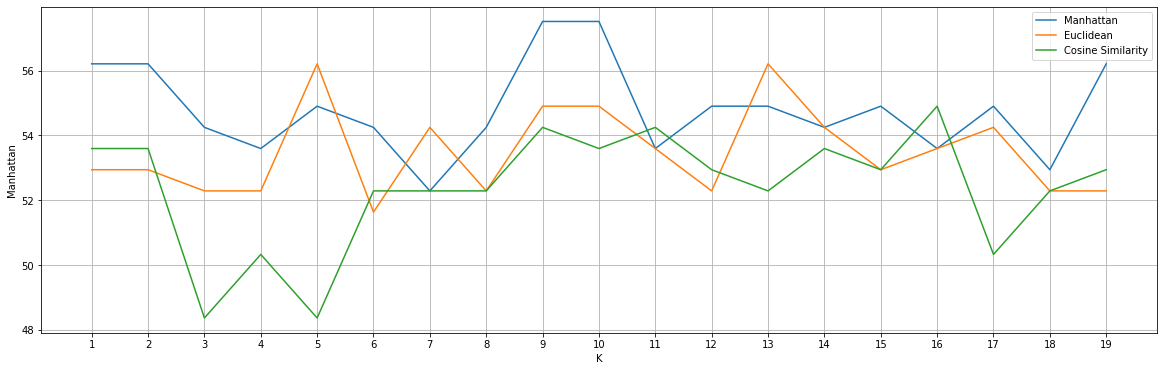

In [17]:
dataframe_MinMax = pd.DataFrame()
dataframe_MinMax['K'] = valueOfK_minmax
dataframe_MinMax['Manhattan'] = accuracyForGivenK_usingManhattan_minmax
dataframe_MinMax['Euclidean'] = accuracyForGivenK_usingEuclidean_minmax
dataframe_MinMax['CosineSim'] = accuracyForGivenK_usingCosineSim_minmax
plt.figure(figsize=(20,6))
plt.xticks(valueOfK_minmax)
sns.lineplot(data=dataframe_MinMax, x='K', y='Manhattan', label='Manhattan')
sns.lineplot(data=dataframe_MinMax, x='K', y='Euclidean', label='Euclidean')
sns.lineplot(data=dataframe_MinMax, x='K', y='CosineSim', label='Cosine Similarity')
# sns.lineplot(x = valueOfK, y=accuracyForGivenK_usingManhattan, labels="Manhattan Distance")
plt.grid()

### Accuracy scores and confusion matrix for unseen holdout data using optimum value of K using above graph 

In [25]:
predictedValuesForHoldoutData_minmax_manhattan = knn(9, train_data_min_max_features, train_data_min_max_labels, holdout_data_min_max_features, 1)
predictedValuesForHoldoutData_minmax_euclidean = knn(13, train_data_min_max_features, train_data_min_max_labels, holdout_data_min_max_features, 2)
predictedValuesForHoldoutData_minmax_cosinesim = knn(16, train_data_min_max_features, train_data_min_max_labels, holdout_data_min_max_features, 3)

print("Accuracy using Manhattan distance for K=12 is: ", calCulateAccuracy(predictedValuesForHoldoutData_minmax_manhattan, holdout_data_min_max_labels))
print("Confusion matrix when using Manhattan distance: ", confusionMatrix(predictedValuesForHoldoutData_minmax_manhattan, holdout_data_min_max_labels))
print("-----------------------------------------------------------------------")
print("Accuracy using Euclidean distance for K=17 is: ", calCulateAccuracy(predictedValuesForHoldoutData_minmax_euclidean, holdout_data_min_max_labels))
print("Confusion matrix when using Euclidean distance: ", confusionMatrix(predictedValuesForHoldoutData_minmax_euclidean, holdout_data_min_max_labels))
print("-----------------------------------------------------------------------")
print("Accuracy using Cosine Similarity distance for K=13 is: ", calCulateAccuracy(predictedValuesForHoldoutData_minmax_cosinesim, holdout_data_min_max_labels))
print("Confusion matrix when using Cosine Similarity distance: ", confusionMatrix(predictedValuesForHoldoutData_minmax_cosinesim, holdout_data_min_max_labels))


Accuracy using Manhattan distance for K=12 is:  72.54901960784314
Confusion matrix when using Manhattan distance:  [[27, 12], [30, 84]]
-----------------------------------------------------------------------
Accuracy using Euclidean distance for K=17 is:  73.20261437908496
Confusion matrix when using Euclidean distance:  [[30, 14], [27, 82]]
-----------------------------------------------------------------------
Accuracy using Cosine Similarity distance for K=13 is:  68.62745098039215
Confusion matrix when using Cosine Similarity distance:  [[29, 20], [28, 76]]


## Analysis of dataset normalised using Z-factor values

In [19]:
train_data_z_score, test_data_z_score, holdout_data_z_score = train_test_holdout_split(dataset_z_score, 0.2, 0.2)

In [20]:
train_data_z_score_features = train_data_z_score[features_columns]
train_data_z_score_labels = train_data_z_score.Outcome

test_data_z_score_features = test_data_z_score[features_columns]
test_data_z_score_labels = test_data_z_score.Outcome

holdout_data_z_score_features = holdout_data_z_score[features_columns]
holdout_data_z_score_labels = holdout_data_z_score.Outcome

In [21]:
valueOfK_Zfactor = []
accuracyForGivenK_usingManhattan_Zfactor = []
accuracyForGivenK_usingEuclidean_Zfactor = []
accuracyForGivenK_usingCosineSim_Zfactor = []

for i in range(1,20):
    valueOfK_Zfactor.append(i)
    predictedValuesForTestData_Manhattan_Zfactor = knn(i,train_data_z_score_features, train_data_z_score_labels, test_data_z_score_features, 1)
    predictedValuesForTestData_Euclidean_Zfactor = knn(i,train_data_z_score_features, train_data_z_score_labels, test_data_z_score_features, 2)
    predictedValuesForTestData_CosineSim_Zfactor = knn(i,train_data_z_score_features, train_data_z_score_labels, test_data_z_score_features, 3)
    accuracyForGivenK_usingManhattan_Zfactor.append(calCulateAccuracy(predictedValuesForTestData_Manhattan_Zfactor, train_data_z_score_labels))
    accuracyForGivenK_usingEuclidean_Zfactor.append(calCulateAccuracy(predictedValuesForTestData_Euclidean_Zfactor, train_data_z_score_labels))
    accuracyForGivenK_usingCosineSim_Zfactor.append(calCulateAccuracy(predictedValuesForTestData_CosineSim_Zfactor, train_data_z_score_labels))


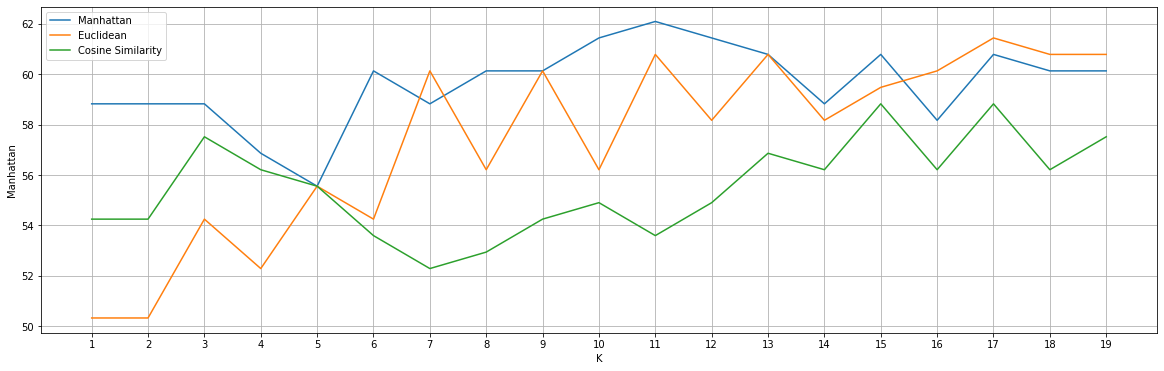

In [22]:
dataframe_Zfactor = pd.DataFrame()
dataframe_Zfactor['K'] = valueOfK_Zfactor
dataframe_Zfactor['Manhattan'] = accuracyForGivenK_usingManhattan_Zfactor
dataframe_Zfactor['Euclidean'] = accuracyForGivenK_usingEuclidean_Zfactor
dataframe_Zfactor['CosineSim'] = accuracyForGivenK_usingCosineSim_Zfactor
plt.figure(figsize=(20,6))
plt.xticks(valueOfK_Zfactor)
sns.lineplot(data=dataframe_Zfactor, x='K', y='Manhattan', label='Manhattan')
sns.lineplot(data=dataframe_Zfactor, x='K', y='Euclidean', label='Euclidean')
sns.lineplot(data=dataframe_Zfactor, x='K', y='CosineSim', label='Cosine Similarity')
plt.grid()

### Accuracy scores and confusion matrix for unseen holdout data using optimum value of K using above graph

In [24]:
predictedValuesForHoldoutData_zfactor_manhattan = knn(11, train_data_min_max_features, train_data_min_max_labels, holdout_data_z_score_features, 1)
predictedValuesForHoldoutData_zfactor_euclidean = knn(13, train_data_z_score_features, train_data_z_score_labels, holdout_data_z_score_features, 2)
predictedValuesForHoldoutData_zfactor_cosinesim = knn(15, train_data_min_max_features, train_data_min_max_labels, holdout_data_z_score_features, 3)

print("Accuracy using Manhattan distance for K=11 is: ", calCulateAccuracy(predictedValuesForHoldoutData_zfactor_manhattan, holdout_data_z_score_labels))
print("Confusion matrix when using Manhattan distance: ", confusionMatrix(predictedValuesForHoldoutData_zfactor_manhattan, holdout_data_z_score_labels))
print("-----------------------------------------------------------------------")
print("Accuracy using Euclidean distance for K=13 is: ", calCulateAccuracy(predictedValuesForHoldoutData_zfactor_euclidean, holdout_data_z_score_labels))
print("Confusion matrix when using Euclidean distance: ", confusionMatrix(predictedValuesForHoldoutData_zfactor_euclidean, holdout_data_z_score_labels))
print("-----------------------------------------------------------------------")
print("Accuracy using Cosine Similarity distance for K=15 is: ", calCulateAccuracy(predictedValuesForHoldoutData_zfactor_cosinesim, holdout_data_z_score_labels))
print("Confusion matrix when using Cosine Similarity distance: ", confusionMatrix(predictedValuesForHoldoutData_zfactor_cosinesim, holdout_data_z_score_labels))
print("-----------------------------------------------------------------------")


Accuracy using Manhattan distance for K=11 is:  72.54901960784314
Confusion matrix when using Manhattan distance:  [[24, 9], [33, 87]]
-----------------------------------------------------------------------
Accuracy using Euclidean distance for K=13 is:  72.54901960784314
Confusion matrix when using Euclidean distance:  [[28, 13], [29, 83]]
-----------------------------------------------------------------------
Accuracy using Cosine Similarity distance for K=15 is:  68.62745098039215
Confusion matrix when using Cosine Similarity distance:  [[15, 6], [42, 90]]
-----------------------------------------------------------------------
